# The two-Stream Instability Model


In this notebook, we will present you several animations and figures to understand the instability of two plasma counter streams. Just below, we simulate two streams with 10000 electrons each with an initial speed equal to ten times the thermic velocity.


<IPython.core.display.Javascript object>


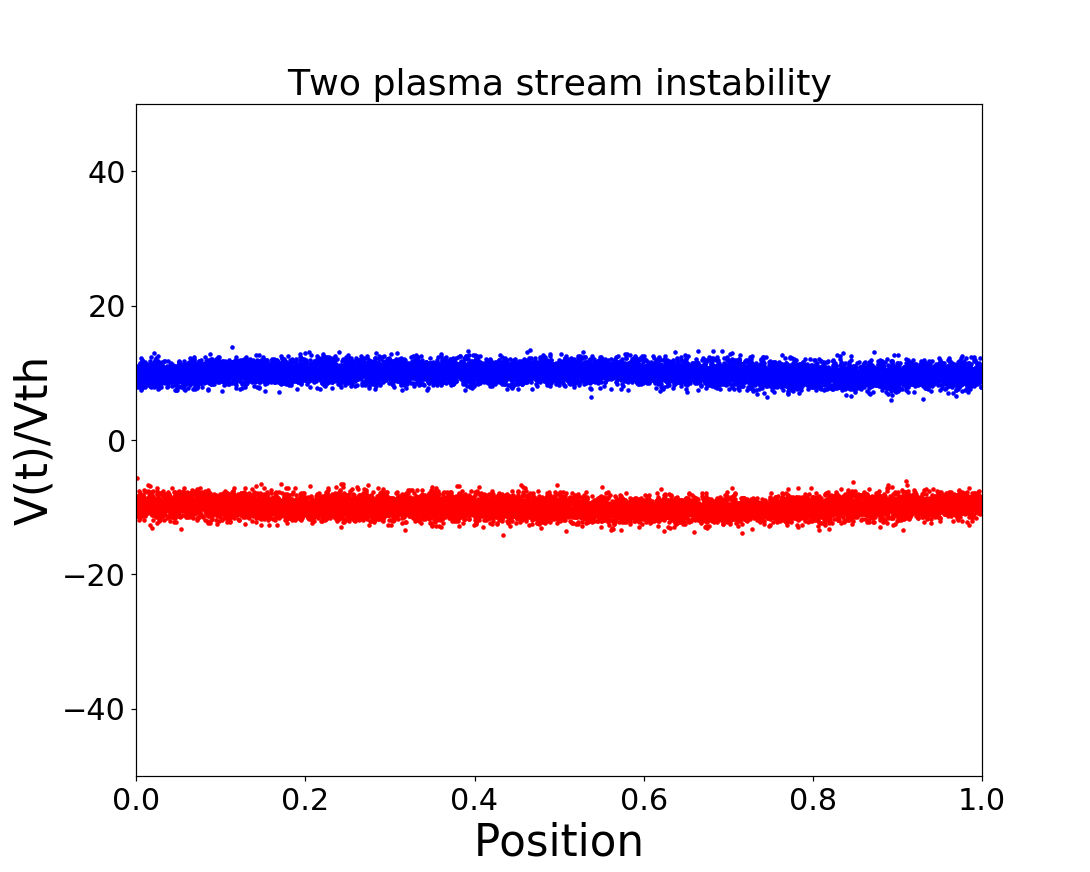

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# make sure labels are large enough in report
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

pos = np.load("../results/position.npy")
vel = np.load("../results/speed.npy")

fig = plt.figure()
#plt.legend()
ax = fig.add_subplot(111)
line, = ax.plot([], [], 'bo', ms=2, color ='blue')
line2, = ax.plot([], [], 'bo', ms=2, color = 'red')
ax.set_xlim(0, 1)
ax.set_ylim(-50, 50)
plt.title("Two plasma stream instability")
plt.xlabel("Position")
plt.ylabel("V(t)/Vth")
N=pos.shape[1]
T=pos.shape[0]

def make_frame(t):
    
    X = pos[(t%T),:N//2]
    V = vel[(t%T),:N//2]
    line.set_data(X, V)
    X2 = pos[(t%T),N//2:]
    V2 = vel[(t%T),N//2:]
    line2.set_data(X2, V2)
    return line, line2,

animation.FuncAnimation(fig, make_frame, interval=10)





## Evolution of the total Energy

In the second figure, we plot (in normalized units) the total energy of our system. We want to check wether we are conserving the energy throughout the simulation.

<IPython.core.display.Javascript object>


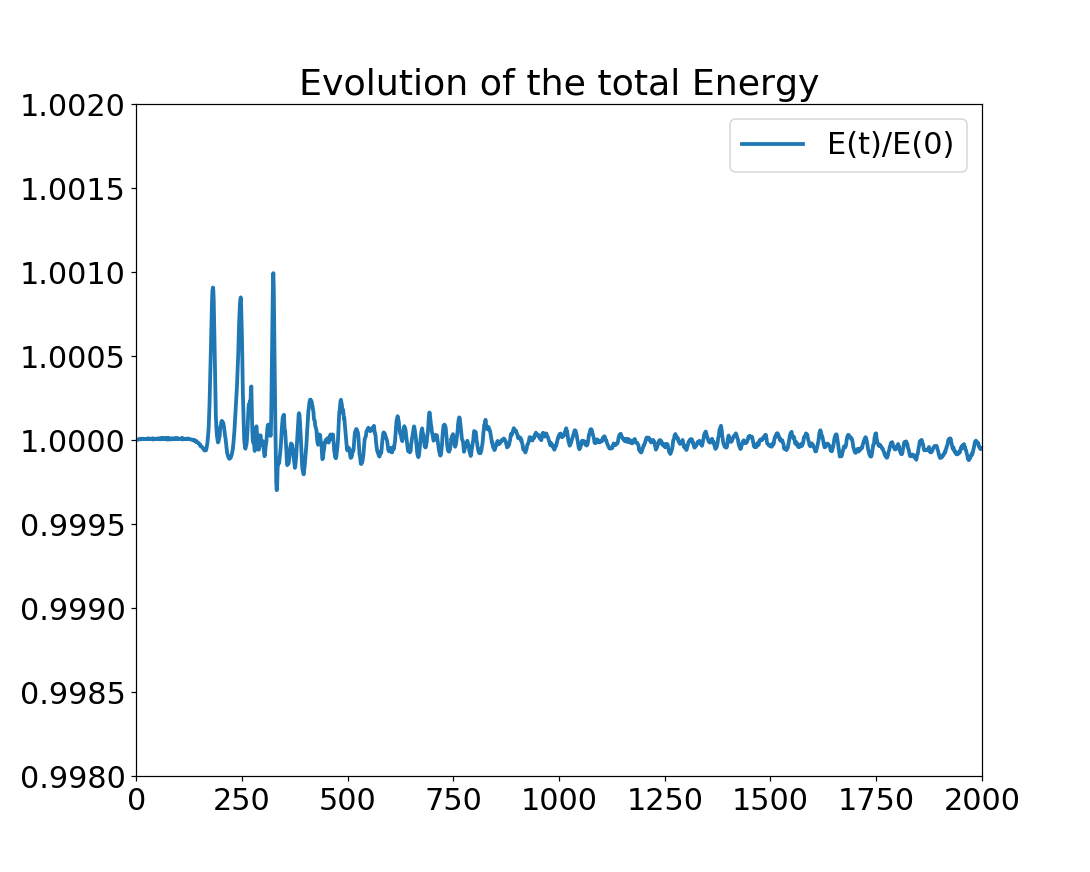

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
energy = np.load("../results/energy.npy")
plt.plot(energy[1:]/energy[1],label="E(t)/E(0)")
plt.axis([0,2000,0.998,1.002])
plt.title("Evolution of the total Energy")
plt.legend()
plt.show()

## Explanation of our deviations

To investigate our deviations, which are not physical, we ploted a number of graphs and we found that we had some absurd ratio between the potential energy and the kinetic energy at the beginning of the instability.

<IPython.core.display.Javascript object>


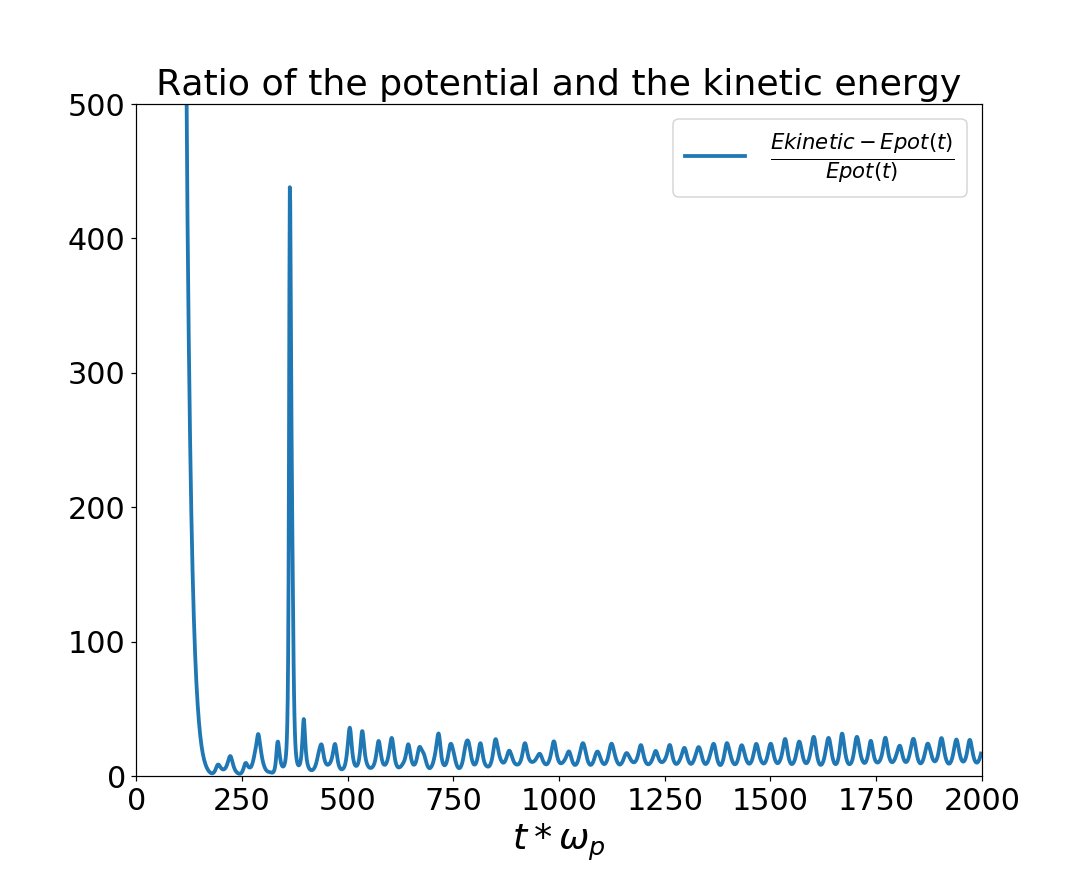

In [92]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
energy = np.load("../results/energy.npy")
vel = np.load("../results/speed.npy")

ekinetic = 0.5*np.sum(vel**2,axis=1)
plt.plot(-(energy[1:]-2*ekinetic[1:])/(energy[1:]-ekinetic[1:]),label=r'$\frac{Ekinetic-Epot(t)}{Epot(t)}$')
plt.xlabel(r'$t*\omega_p$')
plt.axis([0,2000,0,500])
plt.title("Ratio of the potential and the kinetic energy")
plt.legend()
plt.show()

## Effect of the instability on the temperature and the entropy

To compute the effects on the temperature in the plasma, we compute the standard deviation of the speed

<IPython.core.display.Javascript object>


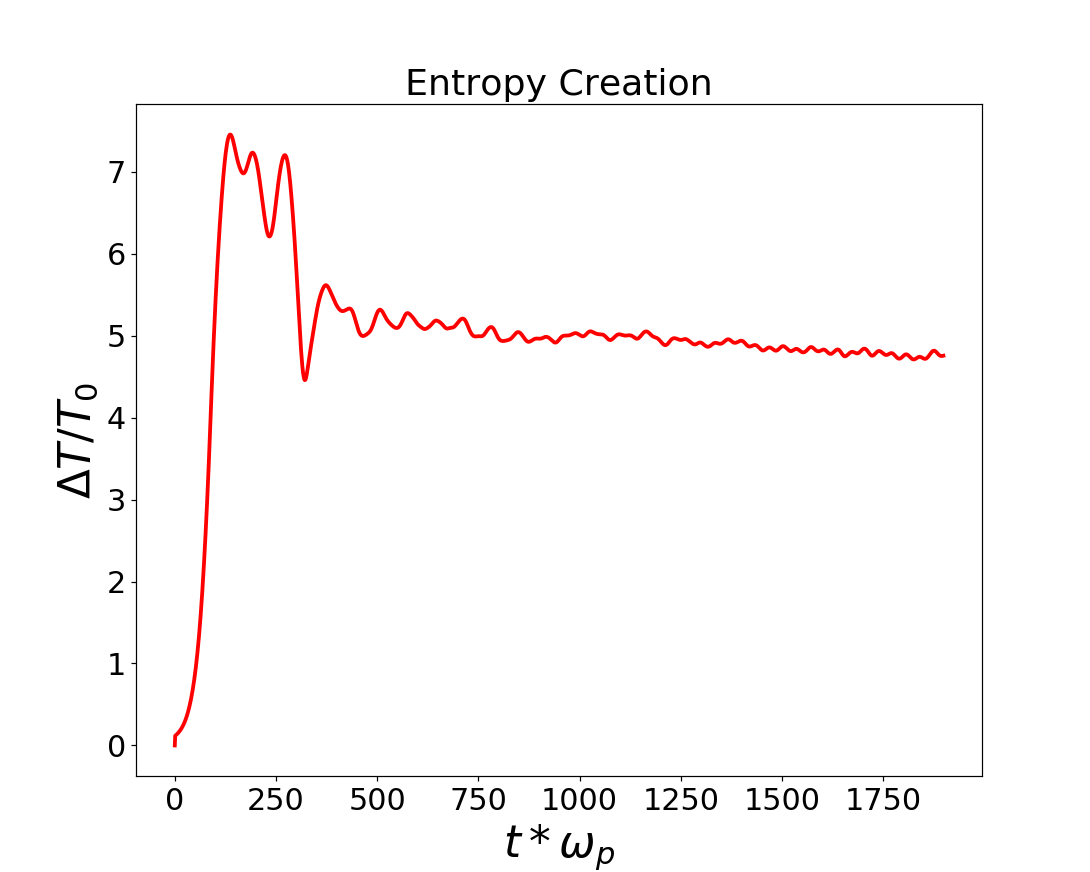

In [102]:
import numpy as np
import matplotlib.pyplot as plt
vel = np.load("../results/speed.npy")


T  = vel.shape[0]
N = vel.shape[1]
# we compute temporal means over nstep steps
nstep = 100

deviation = np.zeros(T-nstep)
sqvel = vel**2
vmoy = np.zeros(N)
v2moy=np.zeros(N)

# Initialization of the averages over nstep steps
for i in range(nstep):
    v2moy += sqvel[i,:]/nstep
    vmoy += vel[i,:]/nstep
    
deviation[0] = 0
for i in range (1,T-nstep):
    vmoy += (vel[i+nstep-1,:]-vel[i-1,:])/nstep
    v2moy += (sqvel[i+nstep-1,:]-sqvel[i-1,:])/nstep
    deviation[i] = np.sum(v2moy - vmoy**2)    # we sum over the 20000 particles
    
plt.plot(np.sqrt(deviation/20000), color="red")
plt.xlabel(r'$t*\omega_p$')
plt.ylabel(r'$\Delta T/T_0$')
plt.title("Entropy Creation")
plt.show()


## The waves vectors through the plasma over the time

Finally, we try to check what we demonstrated in our theory part. We wan to see wether we are going to shift from the constant density to high frequencies.

<IPython.core.display.Javascript object>


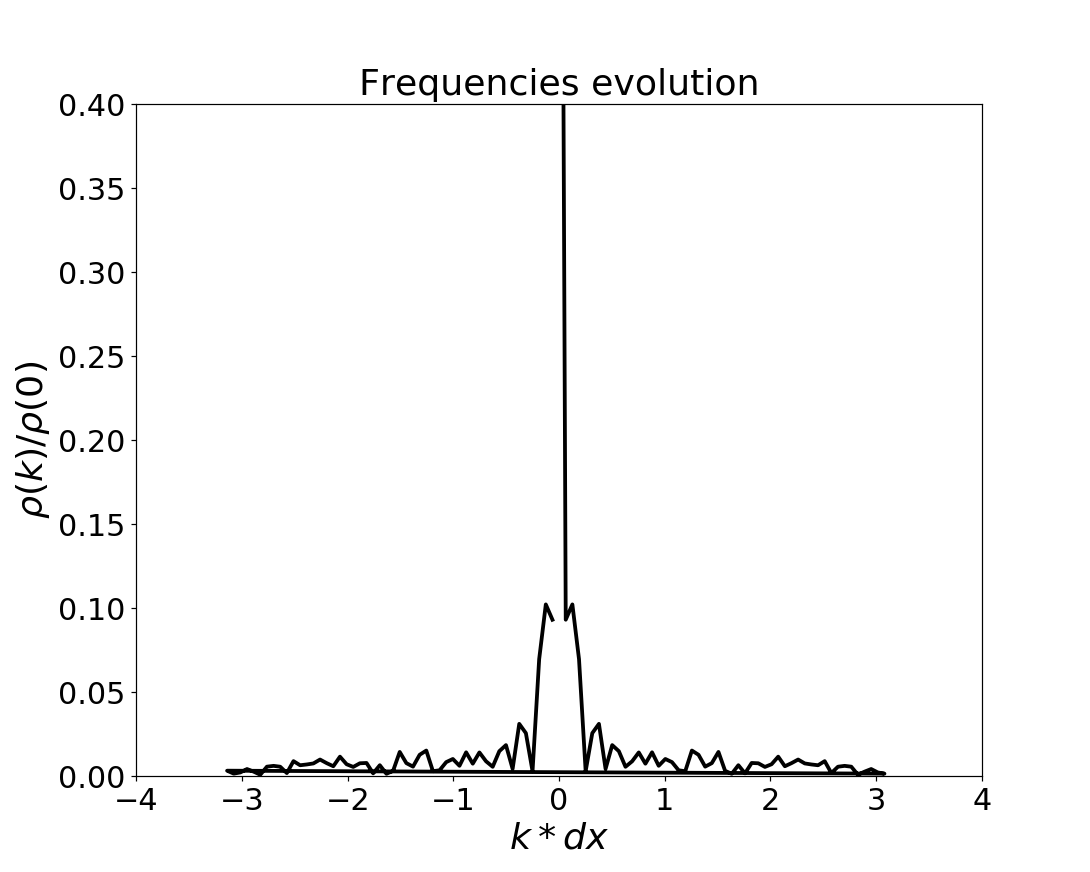

In [103]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

k = np.load("../results/wavevector.npy")
rho_=np.load("../results/density.npy")

fig = plt.figure()
plt.xlabel(r'$k*dx$')
plt.ylabel(r'$\rho(k)/\rho(0)$')
plt.title("Frequencies evolution")
ax = fig.add_subplot(111)
line, = ax.plot([], [], color ='black')
ax.set_xlim(-4, 4)
ax.set_ylim(0,0.4)
n=k.shape[1]
T=k.shape[0]

def make_frame(t):
    
    X = k[(t%T),:]
    Y = rho_[(t%T),:]/rho_[(t%T),0]
    line.set_data(X, Y)
    return line, 

animation.FuncAnimation(fig, make_frame, interval=20)